# Topic Modeling

The code reads text data from a JSON file, performs topic modeling on the text using the LDA model, calculates coherence scores for different numbers of topics, and finally plots a curve showing how the coherence score changes with the number of topics.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of Topics: 2, Coherence Score: 0.5932756383672817
Number of Topics: 3, Coherence Score: 0.520158112632196
Number of Topics: 4, Coherence Score: 0.5628005842601854
Number of Topics: 5, Coherence Score: 0.562038691301075
Number of Topics: 6, Coherence Score: 0.5415600375462352
Number of Topics: 7, Coherence Score: 0.5263512164730221
Number of Topics: 8, Coherence Score: 0.5329217586371522
Number of Topics: 9, Coherence Score: 0.48428529744885057
Number of Topics: 10, Coherence Score: 0.5106909590837558
Number of Topics: 11, Coherence Score: 0.482983372117528
Number of Topics: 12, Coherence Score: 0.48943491976323933
Number of Topics: 13, Coherence Score: 0.49114442344542153
Number of Topics: 14, Coherence Score: 0.4719467054373668
Number of Topics: 15, Coherence Score: 0.43532299923079826
Number of Topics: 16, Coherence Score: 0.47584443245559455
Number of Topics: 17, Coherence Score: 0.4341284441531212
Number of Topics: 18, Coherence Score: 0.44751378166386857
Number of Topics: 1

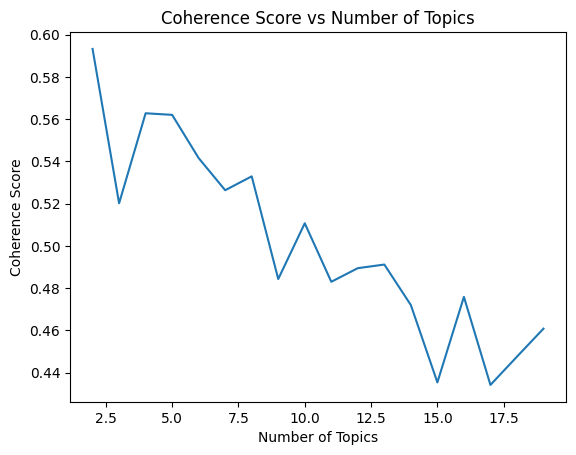

In [ ]:
import json
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

custom_stop_words = set(stopwords.words('english')).union({
    'people', 'like', 'would', 'one', 'make', 'get', 'think', 'could', 'it', 'going', 'really', "oh", "na", 'gt', 'comment'
})

file_path = '/content/drive/MyDrive/deepfake/Processed_deepfake.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

body_texts = [item['body'] for item in data]

processed_texts = [
    [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in custom_stop_words]
    for text in body_texts
]

dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=210, passes=20, iterations=400)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence = coherencemodel.get_coherence()
        coherence_values.append(coherence)
        print(f'Number of Topics: {num_topics}, Coherence Score: {coherence}')
    return model_list, coherence_values

start, limit, step = 2, 20, 1

model_list, coherence_values = compute_coherence_values(dictionary, corpus, processed_texts, limit, start, step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.show()


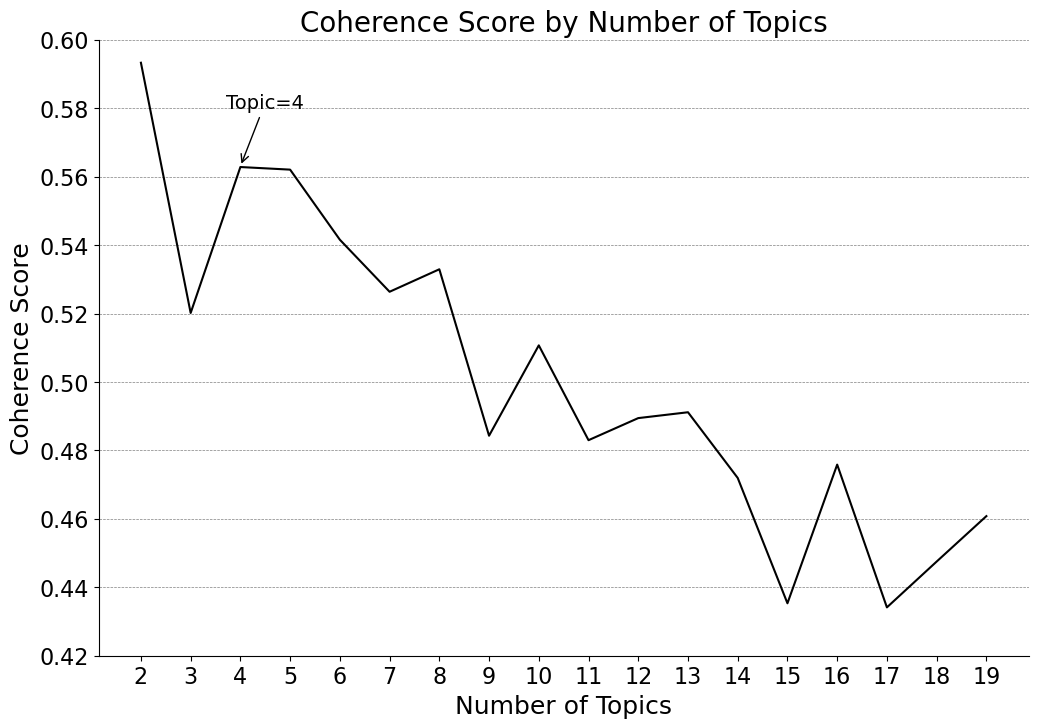

In [2]:
data = {
    "Number of Topics": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    "Coherence Score": [0.5932756383672817, 0.520158112632196, 0.5628005842601854, 0.562038691301075,
                        0.5415600375462352, 0.5263512164730221, 0.5329217586371522, 0.48428529744885057,
                        0.5106909590837558, 0.482983372117528, 0.48943491976323933, 0.49114442344542153,
                        0.4719467054373668, 0.43532299923079826, 0.47584443245559455, 0.4341284441531212,
                        0.44751378166386857, 0.46079172093671694]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
plt.plot(df["Number of Topics"], df["Coherence Score"], linestyle='-', color='black')
plt.title('Coherence Score by Number of Topics', fontsize=20)
plt.xlabel('Number of Topics', fontsize=18)
plt.ylabel('Coherence Score', fontsize=18)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.xticks(df["Number of Topics"], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.42, 0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.annotate('Topic=4', xy=(4, 0.563), xytext=(4.5, 0.58),
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0'),
             fontsize=14, ha='center')

plt.savefig("Coherence_Score_by_Number_of_Topics.pdf", format='pdf')

plt.show()


## Determine the number of topics

In the generated graph, the coherence score peaks at 4 topics. This peak indicates that the model with 4 topics achieves the optimal balance between having enough topics to represent the data well and maintaining coherent, meaningful topics. After 4 topics, the coherence score starts to decline, suggesting that adding more topics might lead to reduced interpretability or relevance of the topics. We printed the top 10 most frequent words in the 4 topics and plotted them as bar charts.

In [ ]:
num_topics = 4
lda_model = model_list[num_topics - start]

for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f'Topic #{idx+1}: {topic}')

Topic #1: 0.014*"look" + 0.012*"face" + 0.010*"year" + 0.008*"good" + 0.008*"movie" + 0.008*"tom" + 0.007*"guy" + 0.006*"cruise" + 0.006*"man" + 0.006*"see"
Topic #2: 0.016*"fake" + 0.013*"ai" + 0.010*"video" + 0.009*"thing" + 0.009*"real" + 0.009*"deep" + 0.008*"even" + 0.006*"know" + 0.006*"way" + 0.006*"see"
Topic #3: 0.011*"lol" + 0.008*"great" + 0.007*"destiny" + 0.006*"thanks" + 0.005*"got" + 0.004*"sound" + 0.004*"trump" + 0.004*"shit" + 0.004*"money" + 0.004*"said"
Topic #4: 0.010*"law" + 0.010*"porn" + 0.007*"woman" + 0.007*"image" + 0.007*"child" + 0.006*"illegal" + 0.005*"someone" + 0.005*"right" + 0.004*"school" + 0.004*"without"


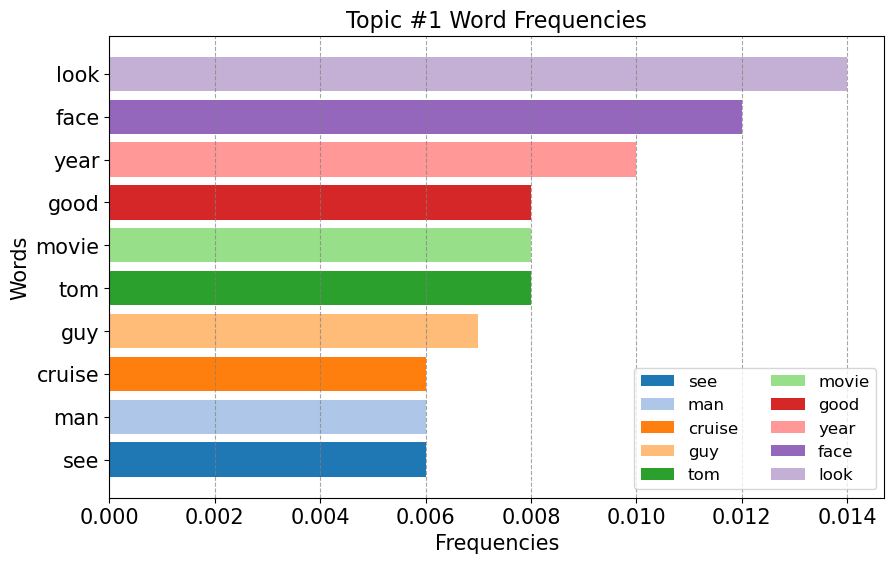

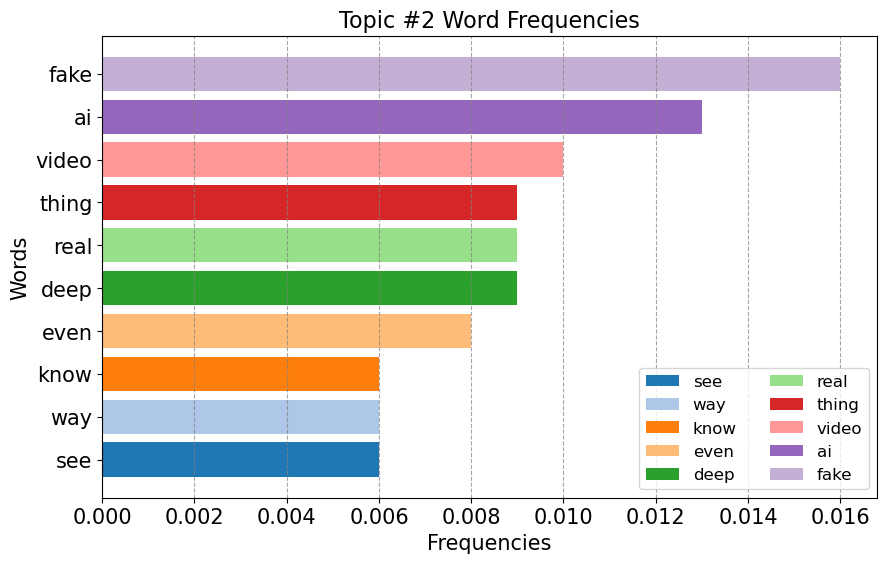

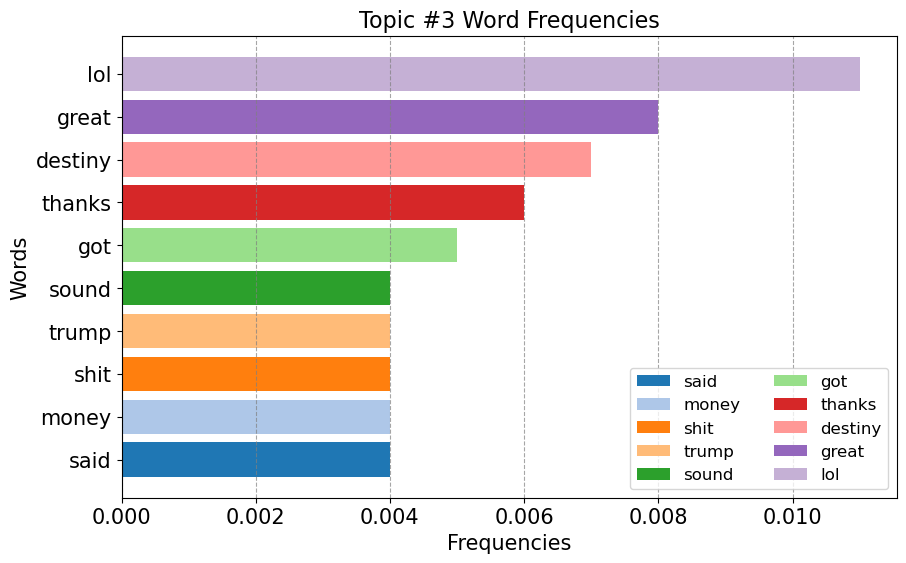

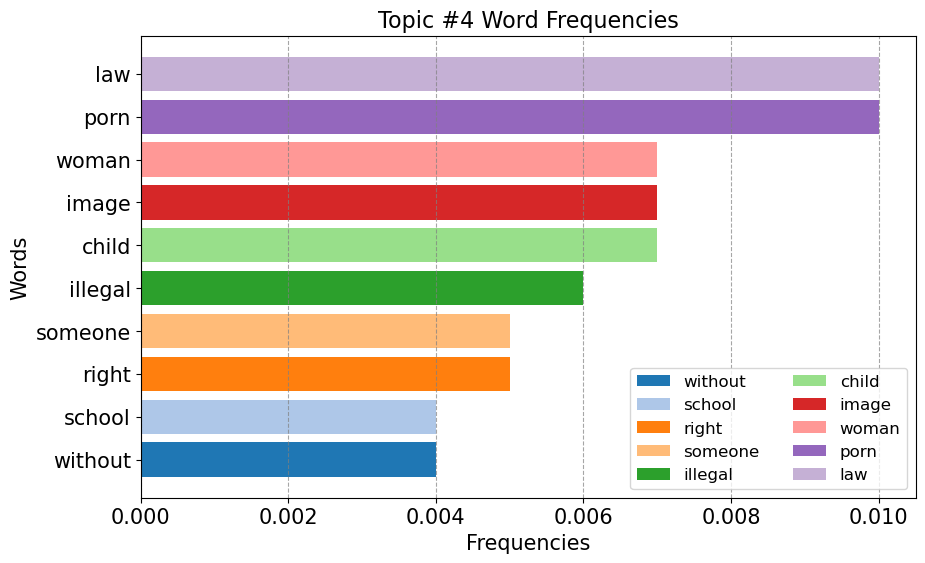

In [3]:
topics = {
    "Topic #1": {
        "words": ["look", "face", "year", "good", "movie", "tom", "guy", "cruise", "man", "see"],
        "frequencies": [0.014, 0.012, 0.010, 0.008, 0.008, 0.008, 0.007, 0.006, 0.006, 0.006]
    },
    "Topic #2": {
        "words": ["fake", "ai", "video", "thing", "real", "deep", "even", "know", "way", "see"],
        "frequencies": [0.016, 0.013, 0.010, 0.009, 0.009, 0.009, 0.008, 0.006, 0.006, 0.006]
    },
    "Topic #3": {
        "words": ["lol", "great", "destiny", "thanks", "got", "sound", "trump", "shit", "money", "said"],
        "frequencies": [0.011, 0.008, 0.007, 0.006, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004]
    },
    "Topic #4": {
        "words": ["law", "porn", "woman", "image", "child", "illegal", "someone", "right", "school", "without"],
        "frequencies": [0.010, 0.010, 0.007, 0.007, 0.007, 0.006, 0.005, 0.005, 0.004, 0.004]
    }
}

def plot_topic_word_frequencies(topic_name, words, frequencies):
    sorted_indices = sorted(range(len(frequencies)), key=lambda k: frequencies[k], reverse=True)
    sorted_words = [words[i] for i in sorted_indices]
    sorted_frequencies = [frequencies[i] for i in sorted_indices]

    plt.figure(figsize=(10, 6))
    bars = plt.barh(sorted_words[::-1], sorted_frequencies[::-1], color=plt.cm.tab20.colors)
    plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)
    plt.legend(bars, sorted_words[::-1], loc='lower right', ncol=2, fontsize=12)
    plt.ylabel('Words', fontsize=15)
    plt.xlabel('Frequencies', fontsize=15)
    plt.title(f'{topic_name} Word Frequencies', fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig(f'{topic_name}_word_frequencies.pdf', format='pdf')
    plt.show()

for topic_name, data in topics.items():
    plot_topic_word_frequencies(topic_name, data['words'], data['frequencies'])


# pyLDAvis Topic Visualization

In [ ]:
!pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.2 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

optimal_model = model_list[2]

vis_data = pyLDAvis.gensim_models.prepare(optimal_model, corpus, dictionary)
pyLDAvis.display(vis_data)

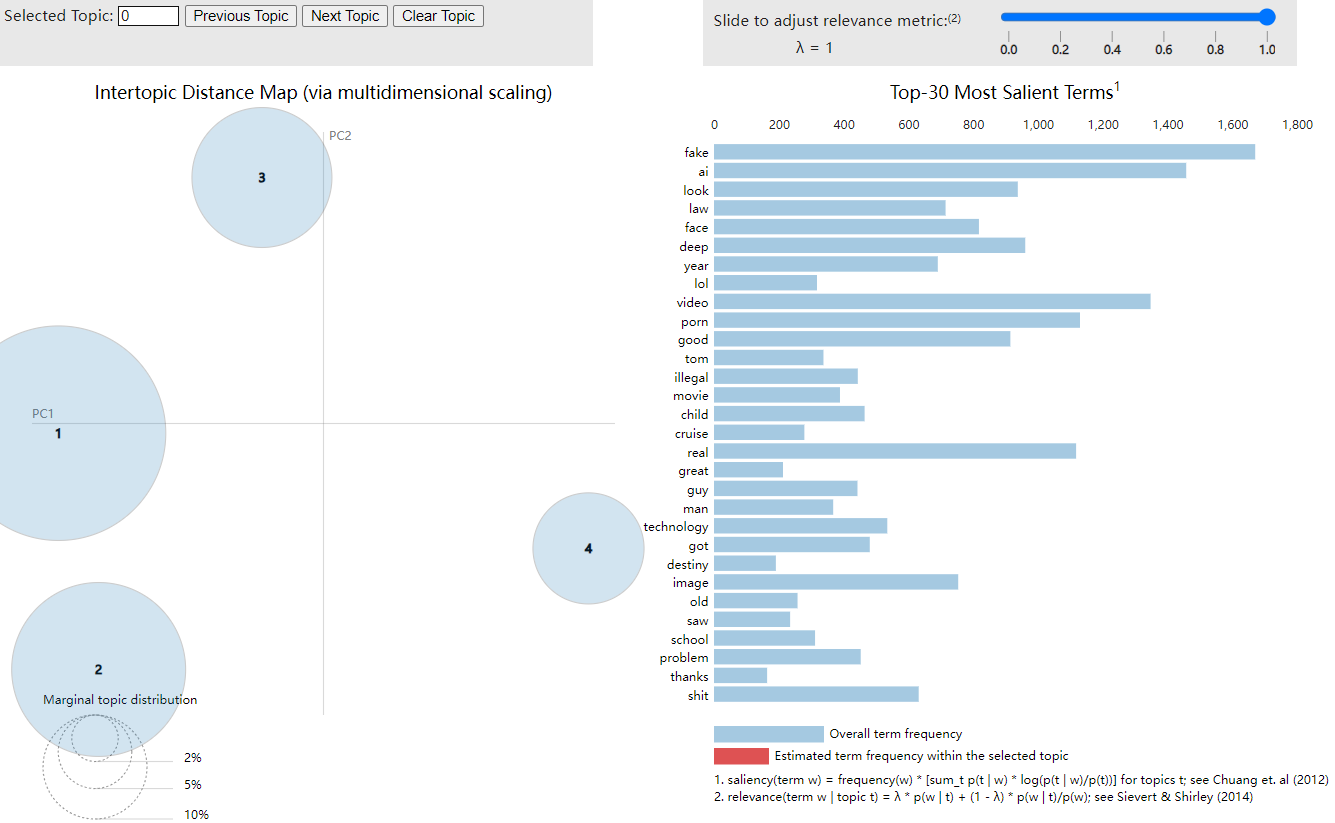